In [39]:
import src.web_scraping.downloading as downloading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
metrics = [
    'infant mortality rate', 'population growth rate',
    'age structure', 'birth rate', 'net migration rate',
    'alcohol consumption per capita', 'child marriage',
    'contraceptive prevalence rate',
    'currently married women ages 15 49', 'death rate',
    'education expenditures', 'gdp official exchange rate',
    'gini index coefficient distribution of family income',
    'labor force by occupation', 'life expectancy at birth',
    'literacy', 'maternal mortality ratio',
    'mothers mean age at first birth',
    'obesity adult prevalence rate', 'physicians density',
    'population below poverty line',
    'school life expectancy primary to tertiary education',
    'sex ratio', 'tobacco use', 'total fertility rate',
    'unemployment rate', 'current health expenditure', 'median age'
]

In [41]:
downloading.download_metrics(metrics)

In [42]:
median_age = downloading.open_metric('median age')
age_structure = downloading.open_metric('age structure')
age_structure['median age'] = median_age['total']

In [43]:
print(age_structure.head())
print(age_structure.describe())
n_countries = age_structure.shape[0]

               0-14 years  15-64 years  65 years and over  median age
country                                                              
China               16.48        69.40              14.11        38.4
India               24.77        68.42               6.80        28.7
United States       18.15        63.72              18.12        38.5
Indonesia           24.22        68.10               7.68        31.1
Pakistan            34.81        60.41               4.77        22.0
       0-14 years  15-64 years  65 years and over  median age
count  228.000000   228.000000         228.000000  227.000000
mean    24.892807    64.029342          10.772895   31.537004
std      9.586638     6.423941           6.994487    9.081745
min      9.400000    12.200000           1.410000   14.800000
25%     16.840000    61.940000           4.382500   24.000000
50%     22.545000    64.875000           8.740000   31.600000
75%     31.150000    67.560000          16.717500   39.250000
max     49.700

In [44]:
def country_names(df):
    values = df.index.values
    return [val[:20] for val in values]

### Countries age structure

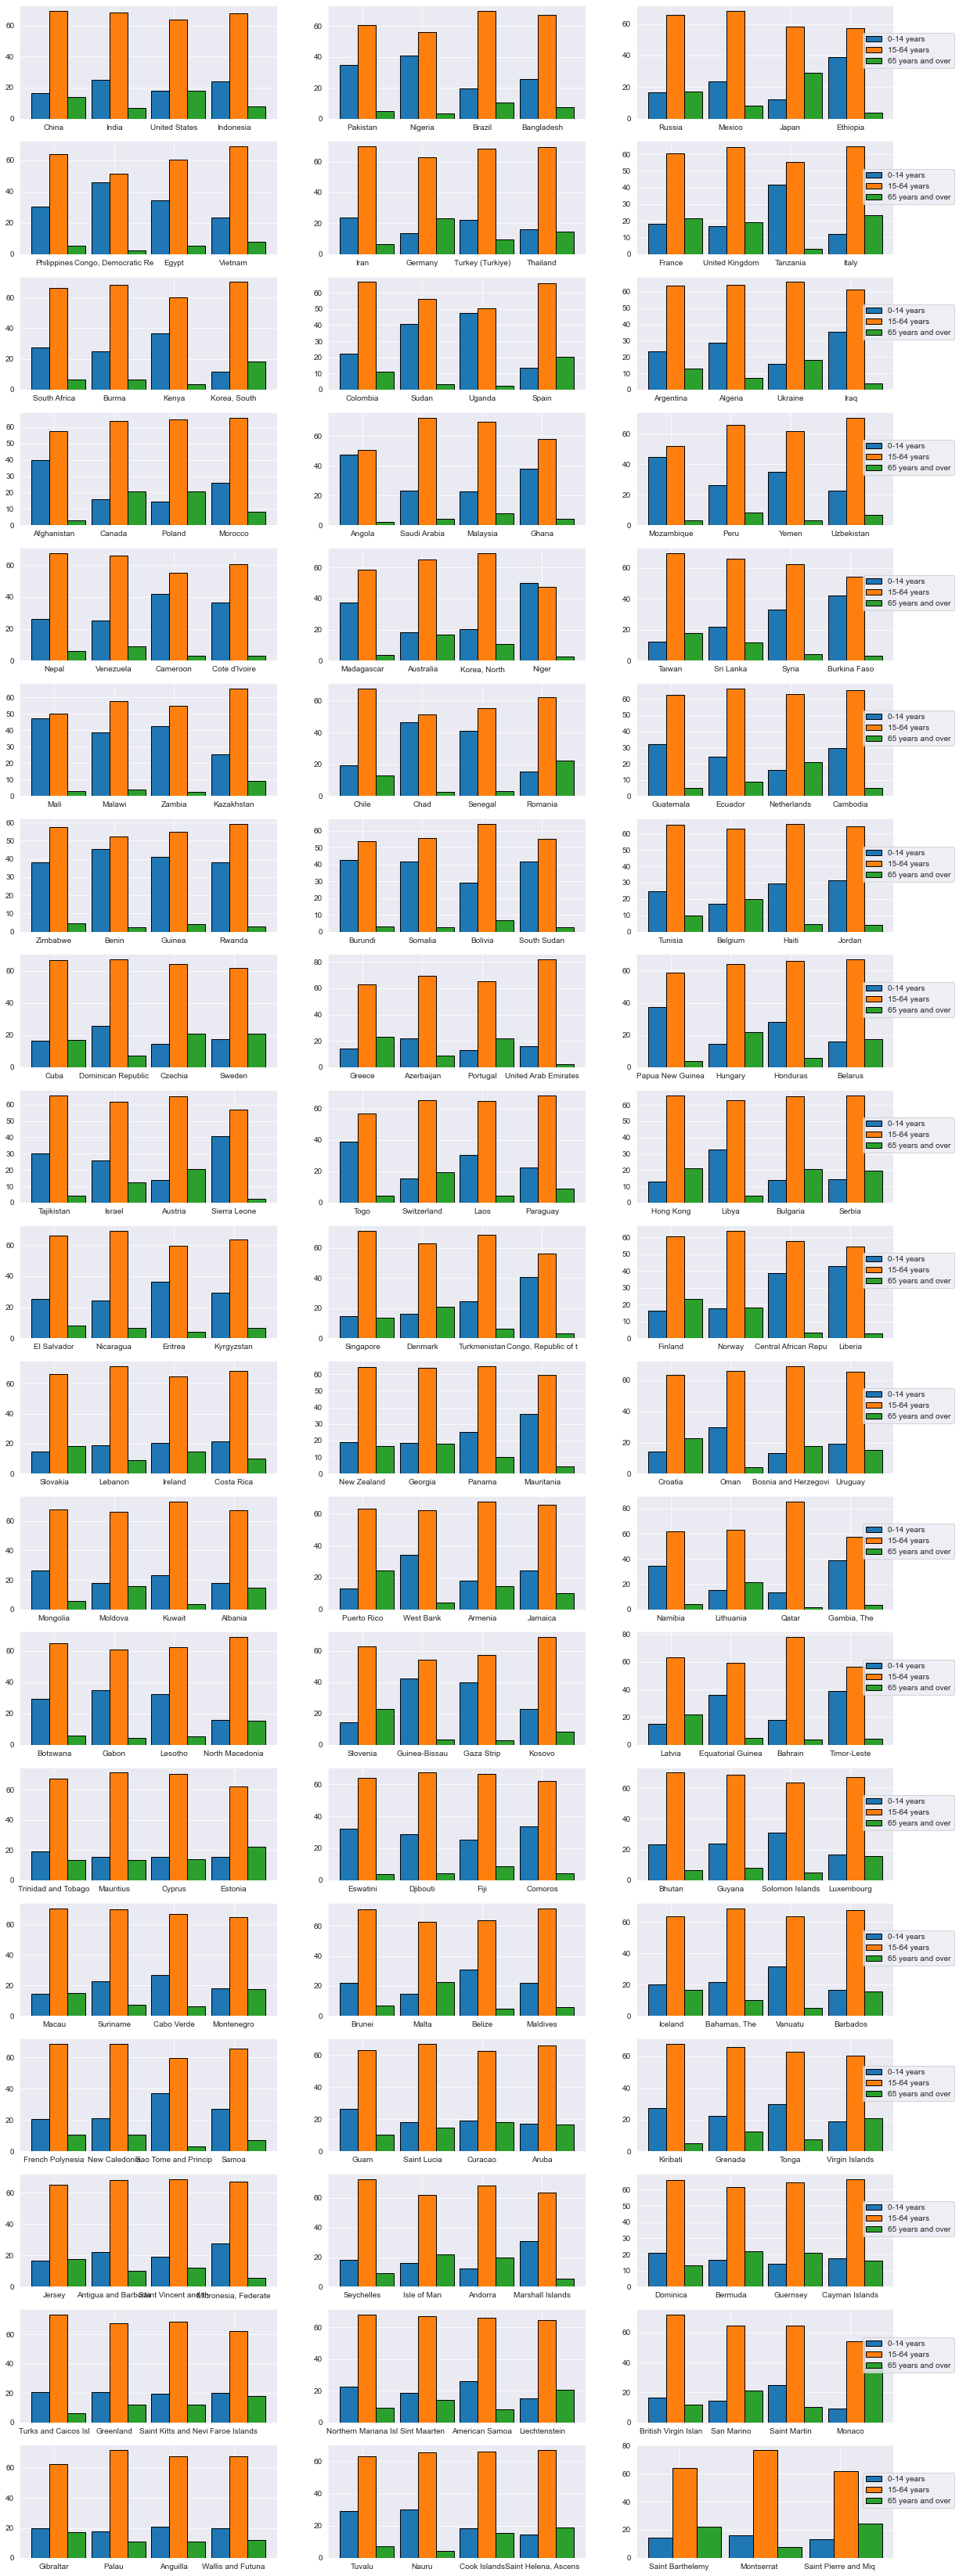

In [45]:
age_structure = age_structure.dropna()
n_c = 4
n_r = 12

n_rows = n_countries // n_r
n_cols = 3
i = 1
plt.figure(figsize=(20, 60))
for row in range(0, n_rows):
    for col in range(0, n_cols):
        plt.subplot(n_rows, n_cols, i)
        i += 1
        curr_rows = age_structure.iloc[row * n_r + col * n_c: min(n_countries, row * n_r + (col + 1) * n_c)]
        spc = np.arange(len(curr_rows))
        plt.bar(spc, curr_rows['0-14 years'], width=0.3, label='0-14 years', edgecolor='k')
        plt.bar(spc + 0.3, curr_rows['15-64 years'], width=0.3, label='15-64 years', edgecolor='k')
        plt.bar(spc + 0.6, curr_rows['65 years and over'], width=0.3, label='65 years and over', edgecolor='k')
        plt.xticks(spc + 0.45 / 2, country_names(curr_rows))
    plt.legend(bbox_to_anchor=(1.25, 0.6), loc='center right')

What could be the definition for ageing population? It can either be the ratio of eldery / youth or the median age. Since in this analysis we don't use temporal data, we'll stick with the ratio. Or assume that the ratio and the median age must be above some threshold

<AxesSubplot:xlabel='ageing_rate'>

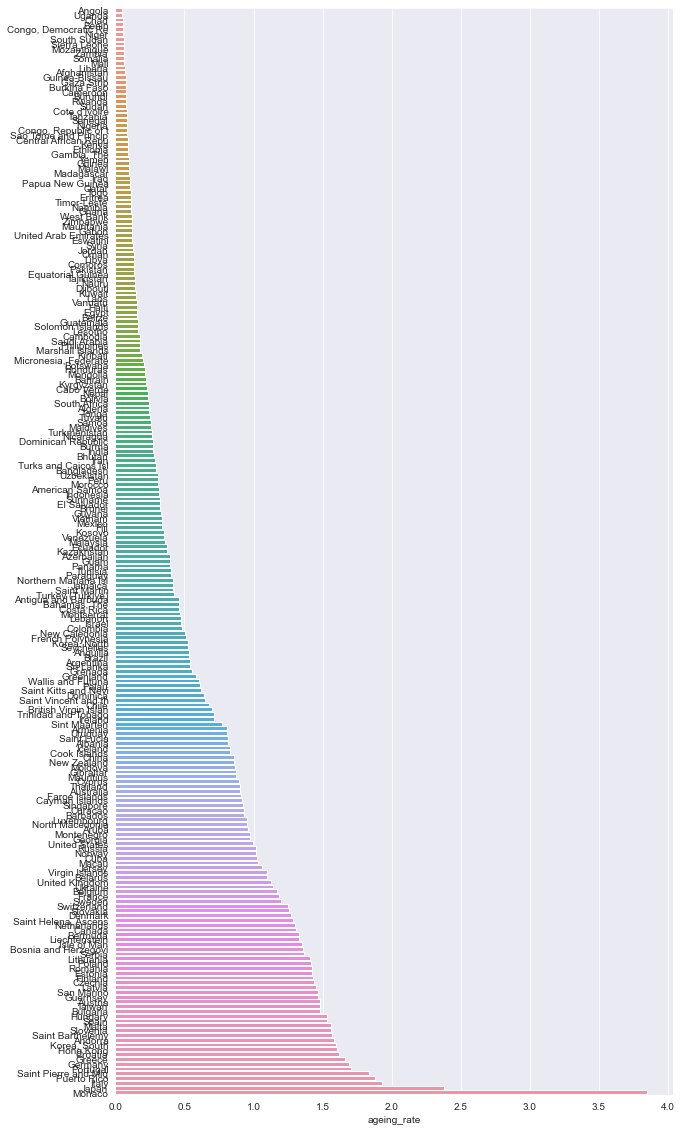

In [46]:
age_structure['ageing_rate'] = age_structure['65 years and over'] / age_structure['0-14 years']

fig, ax = plt.subplots(figsize=(10, 20))
sorted_by_ageing_rate = age_structure.sort_values(by='ageing_rate')
sns.barplot(data=sorted_by_ageing_rate, x='ageing_rate', y=country_names(sorted_by_ageing_rate))

<AxesSubplot:xlabel='median age'>

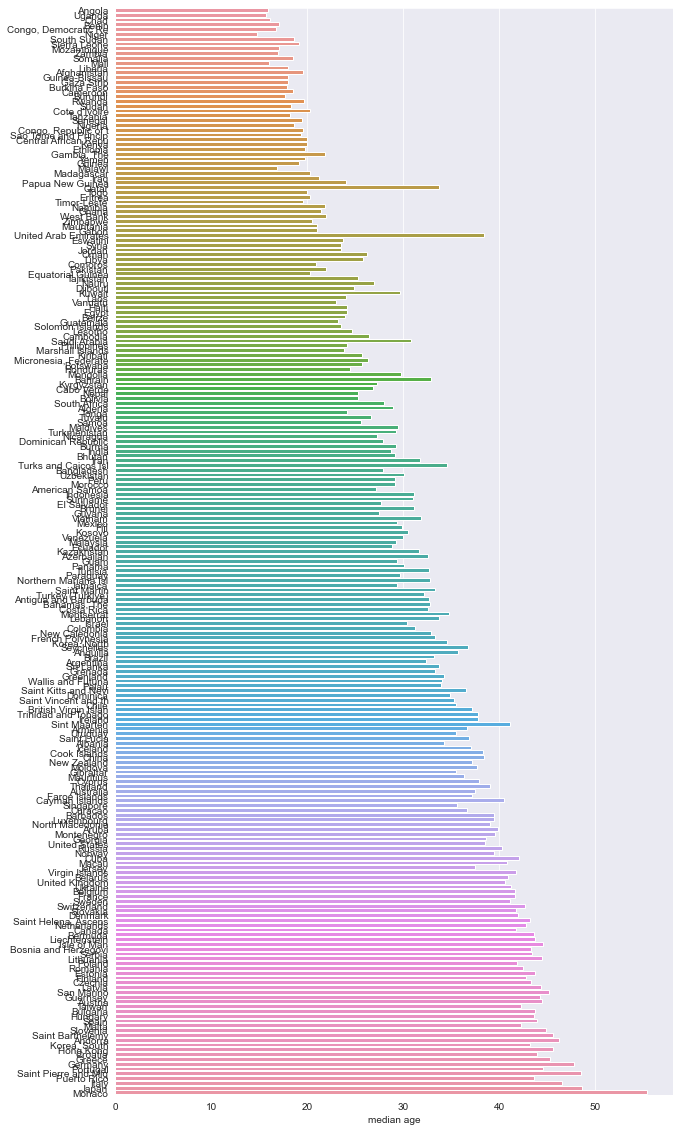

In [47]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(data=sorted_by_ageing_rate, x='median age', y=country_names(sorted_by_ageing_rate))

In [48]:
thresholds = [0.8, 0.9, 1]
ageing_cat = pd.DataFrame(index=['mean', 'n_countries'])
for t in thresholds:
    ageing_cat.at['mean', f't = {t}'] = np.mean(age_structure['ageing_rate'] >= t)
    ageing_cat.at['n_countries', f't = {t}'] = np.sum(age_structure['ageing_rate'] >= t)

ageing_cat.at['mean', 'median'] = np.mean(age_structure['median age'] >= 30)
ageing_cat.at['n_countries', 'median'] = np.sum(age_structure['median age'] >= 30)

ageing_cat.at['mean', 'both'] = np.mean((age_structure['median age'] >= 30) & (age_structure['ageing_rate'] >= 1))
ageing_cat.at['n_countries', 'both'] = np.sum((age_structure['median age'] >= 30) & (age_structure['ageing_rate'] >= 1))
ageing_cat

,t = 0.8,t = 0.9,t = 1,median,both
mean,0.339207,0.286344,0.229075,0.546256,0.229075
n_countries,77.000000,65.000000,52.000000,124.000000,52.000000


In [49]:
ageing_countries = age_structure[age_structure['ageing_rate'] >= 1]
ageing_countries

,0-14 years,15-64 years,65 years and over,median age,ageing_rate
country,,,,,
Russia,16.86,65.99,17.15,40.3,1.017200
Japan,12.29,58.49,29.22,48.6,2.377543
Germany,13.75,62.97,23.28,47.8,1.693091
France,18.04,60.53,21.42,41.7,1.187361
United Kingdom,16.91,64.03,19.06,40.6,1.127144
Italy,12.08,64.61,23.31,46.5,1.929636
"Korea, South",11.53,70.10,18.38,43.2,1.594102
Spain,13.37,66.13,20.50,43.9,1.533283
Ukraine,15.90,65.95,18.15,41.2,1.141509


### Ageing populations
What are the main factors contributing to the ageing of population? Can we predict, based on other factors, whether population is ageing or not? And what should be the threshold to categorize a country as ageing?

We'll start with the most obvious one like: birth rate, life expectancy,

In [50]:
birth_rate = downloading.open_metric('birth rate')
life_expectancy = downloading.open_metric('life expectancy at birth')
death_rate = downloading.open_metric('death rate')
contraceptive_prevalence = downloading.open_metric('contraceptive prevalence rate')
mortality_rate = downloading.open_metric('country mortality rate')
health_expenditures = downloading.open_metric('current health expenditure')
gdp = downloading.open_metric('gdp official exchange rate')
literacy = downloading.open_metric('literacy')
education_expenditures = downloading.open_metric('education expenditures')
population_below_poverty = downloading.open_metric('population below poverty line')
fertility_rate = downloading.open_metric('total fertility rate')
sex_ratio = downloading.open_metric('sex ratio')

In [51]:
fertility_rate

,fertility_rate
country,
China,1.45
India,2.07
United States,1.84
Indonesia,1.99
Pakistan,3.39
...,...
Norfolk Island,NaN
Paracel Islands,NaN
Holy See (Vatican City),NaN


Next, we'll merge them into one dataframe for simpler comparisons

In [52]:
countries_data = pd.DataFrame(index=age_structure.index)

countries_data['birth rate'] = birth_rate['rate']
countries_data['life expectancy total'] = life_expectancy['total population']
countries_data['death rate'] = death_rate['rate']
countries_data['contraceptive prevalence'] = contraceptive_prevalence['rate']
countries_data['mortality rate'] = mortality_rate['total']
countries_data['health expenditures'] = health_expenditures['expenditures']
countries_data['gdp'] = gdp['rate']
countries_data['literacy'] = literacy['total population']
countries_data['education expenditures'] = education_expenditures['rate']
countries_data['population below poverty'] = population_below_poverty['rate']
countries_data['fertility rate'] = fertility_rate['fertility_rate']
countries_data['sex ratio'] = sex_ratio['total population']
countries_data['ageing_rate'] = age_structure['ageing_rate']

In [59]:
print(countries_data.describe())

,birth rate,life expectancy total,death rate,contraceptive prevalence,mortality rate,health expenditures,gdp,literacy,education expenditures,population below poverty,fertility rate,sex ratio,ageing_rate
count,227.000000,227.000000,227.000000,146.000000,227.000000,189.000000,2.250000e+02,166.000000,197.000000,181.000000,227.000000,227.000000,227.000000
mean,17.510749,74.863348,7.483040,49.508904,19.279251,7.076190,3.644853e+11,86.495181,4.691371,26.679006,2.381278,1.003612,0.603324
std,8.825537,6.772967,2.603394,21.005969,18.354030,3.220647,1.785797e+12,17.195411,2.093034,16.854736,1.083483,0.187577,0.567318
min,6.540000,54.050000,1.420000,6.900000,1.510000,1.700000,0.000000e+00,26.800000,0.300000,0.200000,1.090000,0.830000,0.049385
25%,10.800000,70.365000,5.705000,29.750000,5.890000,4.600000,3.561000e+09,80.150000,3.200000,14.800000,1.695000,0.950000,0.139743
50%,14.940000,76.100000,7.140000,52.900000,12.000000,6.500000,2.209000e+10,95.000000,4.500000,22.100000,1.950000,0.980000,0.373713
75%,21.955000,79.885000,9.130000,66.775000,27.685000,9.000000,1.550820e+11,98.575000,5.800000,37.500000,2.730000,1.010000,0.949379
max,46.860000,89.640000,15.170000,85.500000,103.060000,21.500000,2.143323e+13,100.000000,13.600000,82.500000,6.730000,3.340000,3.848936


In [61]:
columns_corr = countries_data.corr()

<AxesSubplot:>

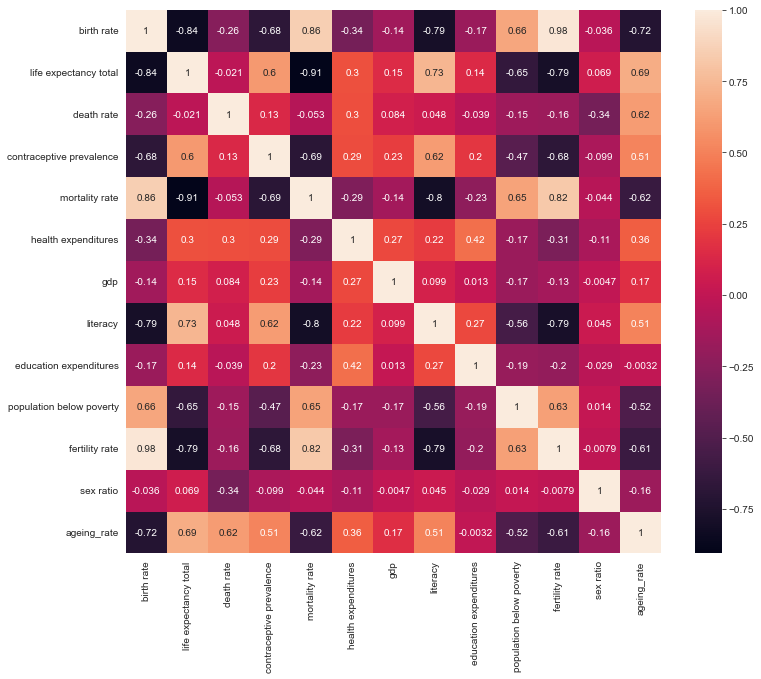

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=columns_corr, annot=True)

In [121]:
from sklearn.model_selection import train_test_split

y = countries_data['ageing_rate']
X = countries_data.drop(['ageing_rate'], axis=1)

tranformed_countries_data = countries_data.dropna(thresh=countries_data.shape[1] // 2)
tranformed_countries_data = tranformed_countries_data.dropna(subset=['ageing_rate'])
valid_rows = np.isin(X.index.values, tranformed_countries_data.index.values)
X_prep = X.loc[valid_rows]
y_prep = y.loc[valid_rows]

X_train, X_test, y_train, y_test = train_test_split(X_prep, y_prep, test_size=0.3,
                                                    random_state=42)
X_train.head()

,birth rate,life expectancy total,death rate,contraceptive prevalence,mortality rate,health expenditures,gdp,literacy,education expenditures,population below poverty,fertility rate,sex ratio
country,,,,,,,,,,,,
Taiwan,7.33,81.38,7.98,75.2,3.90,NaN,6.113910e+11,98.5,NaN,1.5,1.09,0.97
Denmark,11.25,81.87,9.55,NaN,3.00,10.5,3.500370e+11,NaN,6.4,12.5,1.77,0.99
Armenia,10.80,76.40,9.54,57.1,11.89,12.2,1.369400e+10,99.8,2.8,26.4,1.65,0.96
Cook Islands,12.34,77.39,9.20,NaN,15.53,3.2,2.999000e+08,NaN,4.6,NaN,2.04,1.05
Chad,39.85,59.57,9.21,8.1,63.99,5.4,1.091200e+10,26.8,2.9,42.3,5.35,0.98


Our data contains missing values. We'll fill in the missing values with the average and drop samples where more than 50% is missing

In [122]:
print(X_train.describe())
print(y_train.describe())

       birth rate  life expectancy total  death rate  \
count  158.000000             158.000000  158.000000   
mean    17.458291              74.913861    7.271013   
std      8.288075               6.366570    2.548064   
min      6.540000              54.050000    1.620000   
25%     11.275000              71.665000    5.590000   
50%     15.030000              76.090000    6.835000   
75%     21.950000              79.687500    8.987500   
max     41.420000              85.160000   15.120000   

       contraceptive prevalence  mortality rate  health expenditures  \
count                106.000000      158.000000           129.000000   
mean                  50.084906       18.987342             7.264341   
std                   20.396180       17.503811             3.415676   
min                    6.900000        1.510000             2.400000   
25%                   30.200000        6.655000             4.600000   
50%                   53.850000       12.135000             6.7

### Linear Regression

In [134]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    StandardScaler(), LinearRegression()
)

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9361022041306085

Now we don't have any missing values - otherwise, some sklearn algorithms may not run

In [136]:
model.score(X_test, y_test)

0.8324558294555569

Let's try to make a prediction for the rows with test set

count    227.000000
mean       0.603324
std        0.567318
min        0.049385
25%        0.139743
50%        0.373713
75%        0.949379
max        3.848936
Name: ageing_rate, dtype: float64


(array([69., 28., 26., 16.,  7.,  5., 18., 11.,  6.,  7., 11., 11.,  6.,
         1.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.04938533, 0.17603703, 0.30268872, 0.42934042, 0.55599211,
        0.68264381, 0.8092955 , 0.93594719, 1.06259889, 1.18925058,
        1.31590228, 1.44255397, 1.56920567, 1.69585736, 1.82250906,
        1.94916075, 2.07581245, 2.20246414, 2.32911584, 2.45576753,
        2.58241922, 2.70907092, 2.83572261, 2.96237431, 3.089026  ,
        3.2156777 , 3.34232939, 3.46898109, 3.59563278, 3.72228448,
        3.84893617]),
 <BarContainer object of 30 artists>)

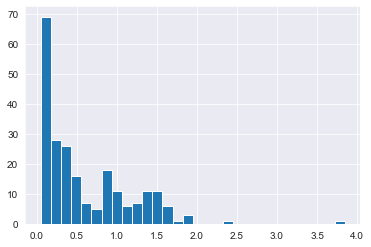

In [138]:
print(countries_data['ageing_rate'].describe())
plt.hist(countries_data['ageing_rate'], bins=30)

### Polynomial Regression

In [144]:
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(), LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [146]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, model.predict(X_train))

4.31010273182198e-14

In [149]:
mean_absolute_error(y_test, model.predict(X_test))

0.6399138445466952

### SVM Regressor

In [150]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

C:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [151]:
print(mean_absolute_error(y_train, svm_reg.predict(X_train)))
print(mean_absolute_error(y_test, svm_reg.predict(X_test)))

0.56343499064561
0.6946653418237108


In [153]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)

SVR(C=100, degree=2, kernel='poly')

In [154]:
print(mean_absolute_error(y_train, svm_poly_reg.predict(X_train)))
print(mean_absolute_error(y_test, svm_poly_reg.predict(X_test)))

0.3906260652466081
0.5157685817687572


In [156]:
svm_rbf_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_rbf_reg.fit(X_train, y_train)

SVR(C=100)

In [157]:
print(mean_absolute_error(y_train, svm_rbf_reg.predict(X_train)))
print(mean_absolute_error(y_test, svm_rbf_reg.predict(X_test)))

0.34990096043985874
0.4891466144378717
